# Lage- und Streuparameter

Wir wollen die grundlegenden Kennzahlen zur Lage und Streuung einer Stichprobe anhand eines Beispiels verstehen.

Als Datensatz nehmen wir die Klimadaten des deutschen Wetterdienstes (DWD). Das package `rdwd` kann Daten vom DWD laden.

In [2]:
#install.packages("rdwd") # auskommentieren, falls rdwd noch nicht installiert
library(rdwd)

Warning message:
“package ‘rdwd’ was built under R version 3.6.2”


Die [Website des Packages](https://bookdown.org/brry/rdwd/) erklärt mit welchen Befehlen Daten geladen werden können. 

Wir untersuchen die jährlichen (`res = "annual"`) Klimadaten (`var = "kl"`) der Wetterstation in Potsdam.

In [3]:
# select a dataset (e.g. last year's daily climate data from Potsdam city):
link <- selectDWD("Potsdam", res="annual", var="kl", per="historical")

# Actually download that dataset, returning the local storage file name:
file <- dataDWD(link, read=FALSE)

# Read the file from the zip folder:
clim <- readDWD(file, varnames=TRUE)

IRkernel::main -> kernel$run -> handle_shell -> executor$execute -> tryCatchList -> tryCatchOne -> doTryCatch -> evaluate -> evaluate_call -> timing_fn -> handle -> try -> tryCatch -> tryCatchList -> tryCatchOne -> doTryCatch -> dataDWD -> dirDWD: adding to directory '/Users/pb/Documents/Lehre/Uni Kassel/Stochastik/StochIng-WiSe-20-21/DWDdata'

IRkernel::main -> kernel$run -> handle_shell -> executor$execute -> tryCatchList -> tryCatchOne -> doTryCatch -> evaluate -> evaluate_call -> timing_fn -> handle -> try -> tryCatch -> tryCatchList -> tryCatchOne -> doTryCatch -> dataDWD: 1 file already existing and not downloaded again:  'annual_kl_historical_jahreswerte_KL_03987_18930101_20191231_hist.zip'
Now downloading 0 files...

Reading file with readDWD.data().



---

Wir untersuchen nun zunächst die Variablen in `clim`.

In [4]:
str(clim)

'data.frame':	127 obs. of  18 variables:
 $ STATIONS_ID                    : int  3987 3987 3987 3987 3987 3987 3987 3987 3987 3987 ...
 $ MESS_DATUM                     : POSIXct, format: "1893-01-15" "1894-01-15" ...
 $ MESS_DATUM_BEGINN              : int  18930101 18940101 18950101 18960101 18970101 18980101 18990101 19000101 19010101 19020101 ...
 $ MESS_DATUM_ENDE                : int  18931231 18941231 18951231 18961231 18971231 18981231 18991231 19001231 19011231 19021231 ...
 $ QN_4                           : int  5 5 5 5 5 5 NA NA NA NA ...
 $ JA_N.Bedeckungsgrad            : num  5.09 5.37 5.24 5.46 5.36 5.48 NA NA NA NA ...
 $ JA_TT.Lufttemperatur           : num  8.13 8.45 7.83 8.09 8.06 8.86 NA NA NA NA ...
 $ JA_TX.Lufttemperatur_Max       : num  12.6 12.6 12.4 12.3 12.4 ...
 $ JA_TN.Lufttemperatur_Min       : num  3.88 4.89 3.89 4.4 4.48 5.27 NA NA NA NA ...
 $ JA_FK.Windstaerke              : num  3.28 3.27 2.99 3.2 3.04 2.85 NA NA NA NA ...
 $ JA_SD_S.Sonnenscheindau

---

Die Funktion `summary`liefert eine Zusammenfassung der wichtigsten Informationen.

In [5]:
summary(clim)

  STATIONS_ID     MESS_DATUM                  MESS_DATUM_BEGINN 
 Min.   :3987   Min.   :1893-01-15 00:00:00   Min.   :18930101  
 1st Qu.:3987   1st Qu.:1924-07-16 00:00:00   1st Qu.:19245101  
 Median :3987   Median :1956-01-15 00:00:00   Median :19560101  
 Mean   :3987   Mean   :1956-01-15 10:34:58   Mean   :19560101  
 3rd Qu.:3987   3rd Qu.:1987-07-16 12:00:00   3rd Qu.:19875101  
 Max.   :3987   Max.   :2019-01-15 00:00:00   Max.   :20190101  
                                                                
 MESS_DATUM_ENDE         QN_4        JA_N.Bedeckungsgrad JA_TT.Lufttemperatur
 Min.   :18931231   Min.   : 3.000   Min.   :4.570       Min.   : 6.620      
 1st Qu.:19246231   1st Qu.: 5.000   1st Qu.:5.240       1st Qu.: 8.250      
 Median :19561231   Median : 5.000   Median :5.420       Median : 8.990      
 Mean   :19561231   Mean   : 6.158   Mean   :5.386       Mean   : 8.992      
 3rd Qu.:19876231   3rd Qu.: 7.500   3rd Qu.:5.590       3rd Qu.: 9.590      
 Max.   :201

---

# Verteilung der Temperaturdaten

Im Folgenden wollen wir den Datensatz zur maximalen Lufttemperatur genauer untersuchen.

In [6]:
T = clim$JA_TX.Lufttemperatur_Max
T

[1] 12.59 12.59 12.43 12.33 12.42 13.15    NA    NA    NA    NA    NA    NA
 [13]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
 [25]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
 [37]    NA    NA 12.21 13.40 12.62 15.16 13.35 13.15 13.13 13.83 13.14 11.22
 [49] 11.33 11.98 14.12 13.38 13.43 13.11 13.27 14.37 14.58 13.40 13.95 12.33
 [61] 14.52 12.43 12.54 11.48 13.54 12.76 14.57 13.06 13.75 11.74 12.50 12.94
 [73] 12.27 13.02 14.02 13.33 12.58 12.35 13.88 12.87 13.33 13.75 14.12 13.45
 [85] 13.34 12.73 12.38 12.07 12.83 14.51 14.30 12.63 12.53 12.98 11.91 13.82
 [97] 15.04 14.52 13.26 14.36 12.96 14.07 13.51 11.52 13.88 13.65 14.76 14.90
[109] 13.44 14.03 14.68 13.73 13.96 14.70 14.91 14.68 14.11 12.44 14.82 13.96
[121] 13.51 15.49 15.35 14.73 14.28 16.13 16.04

Ein erster Überblick über die Daten liefert ein einfacher Plot. Wir plotten die Temperaturen `T` gegen das jeweilige Messdatum. Zudem stellen wir die Daten in einem Histogramm dar.

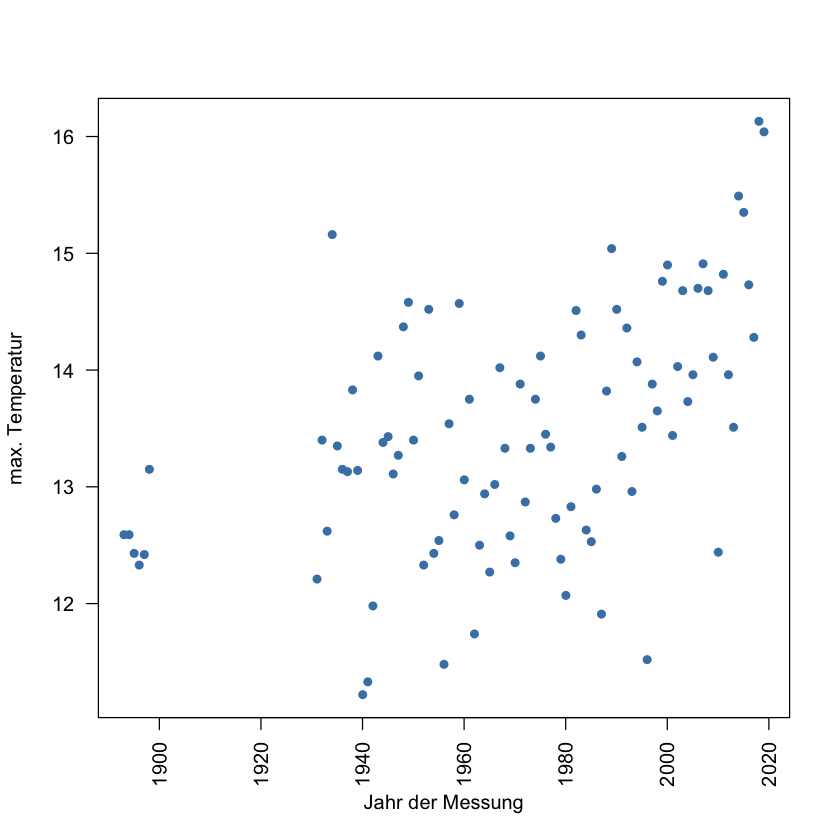

In [7]:
plot(clim$MESS_DATUM, T, xlab = "Jahr der Messung", ylab = "max. Temperatur", las = 2, col = "steelblue", pch = 16)

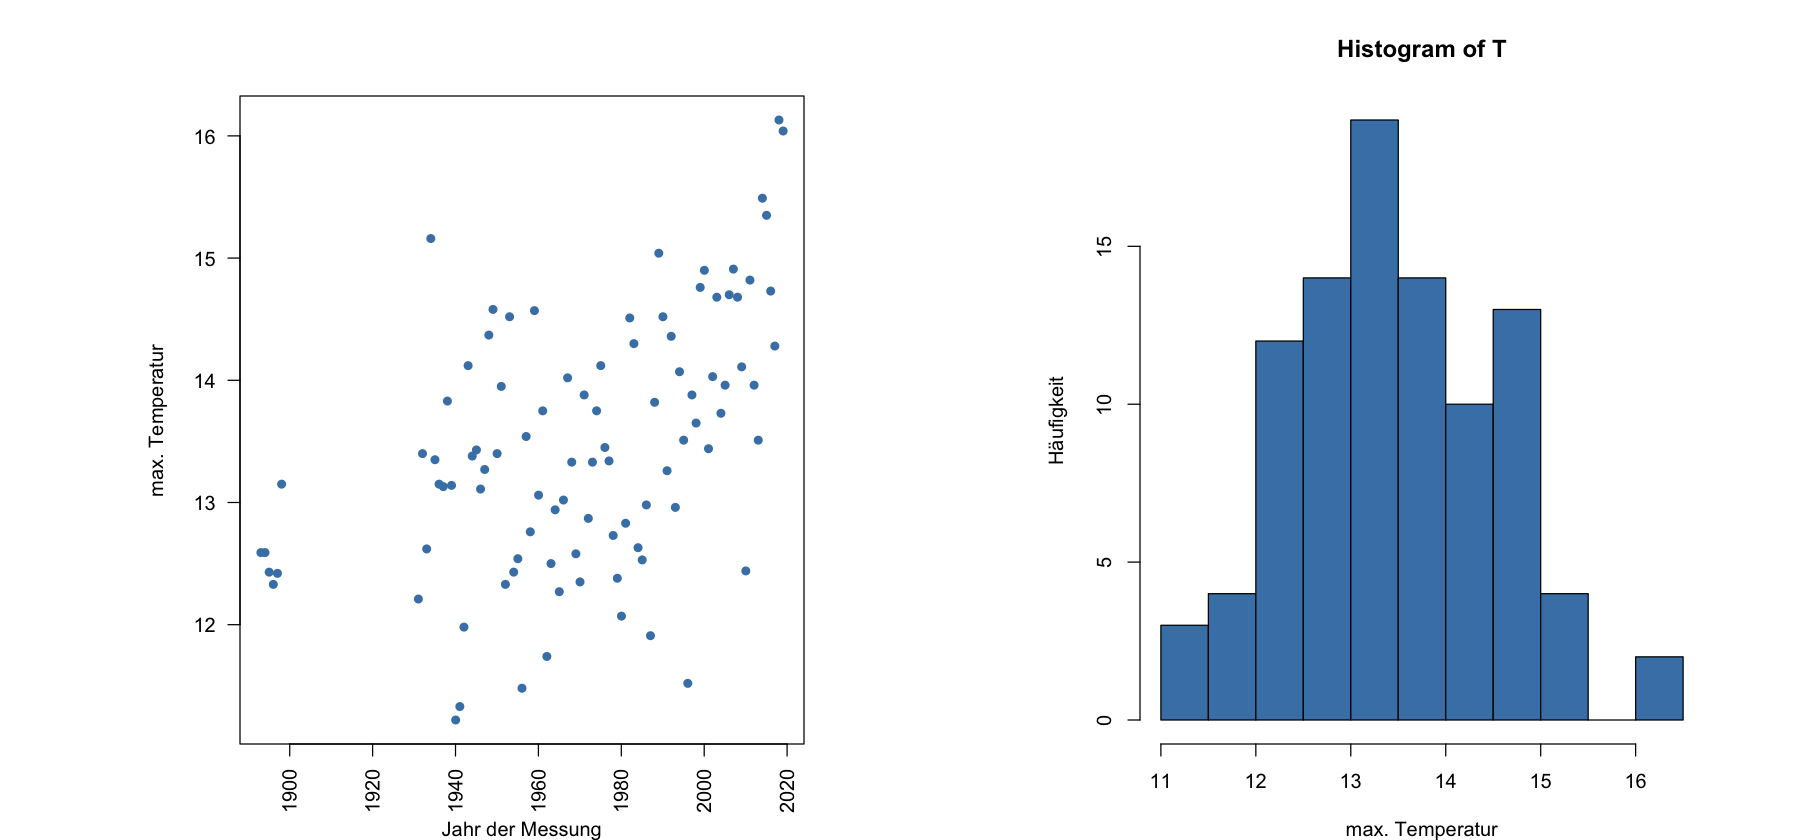

In [8]:
par(mfrow = c(1,2), mar=c(4,10,4,4))
options(repr.plot.width = 15)
plot(clim$MESS_DATUM, T, xlab = "Jahr der Messung", ylab = "max. Temperatur", las = 2, col = "steelblue", pch = 16)
hist(T, xlab = "max. Temperatur", ylab = "Häufigkeit", col = "steelblue")

---

### Rangwerte

Die Rangwerte von `T` lassen sich durch die Sortierfunktion `sort` erhalten.

In [9]:
sort(T)

[1] 11.22 11.33 11.48 11.52 11.74 11.91 11.98 12.07 12.21 12.27 12.33 12.33
[13] 12.35 12.38 12.42 12.43 12.43 12.44 12.50 12.53 12.54 12.58 12.59 12.59
[25] 12.62 12.63 12.73 12.76 12.83 12.87 12.94 12.96 12.98 13.02 13.06 13.11
[37] 13.13 13.14 13.15 13.15 13.26 13.27 13.33 13.33 13.34 13.35 13.38 13.40
[49] 13.40 13.43 13.44 13.45 13.51 13.51 13.54 13.65 13.73 13.75 13.75 13.82
[61] 13.83 13.88 13.88 13.95 13.96 13.96 14.02 14.03 14.07 14.11 14.12 14.12
[73] 14.28 14.30 14.36 14.37 14.51 14.52 14.52 14.57 14.58 14.68 14.68 14.70
[85] 14.73 14.76 14.82 14.90 14.91 15.04 15.16 15.35 15.49 16.04 16.13

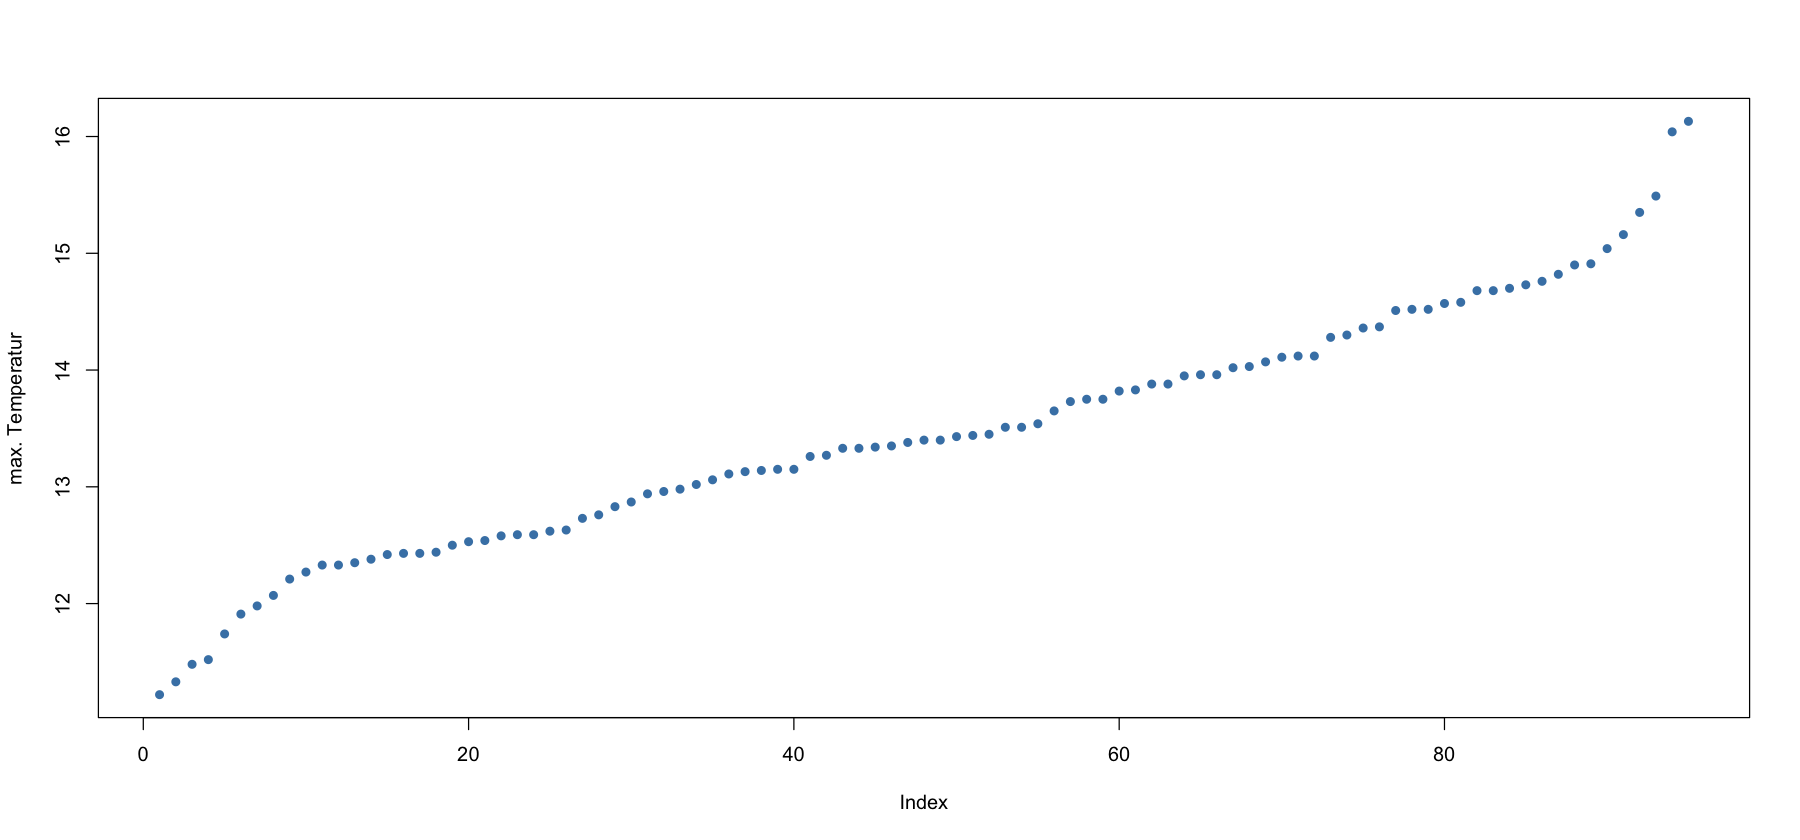

In [10]:
plot(sort(T), ylab = "max. Temperatur", pch = 16, col = "steelblue")

---

### Boxplots

Für eine Visualisierung der Kennzahlen benutzen wir Boxplots:

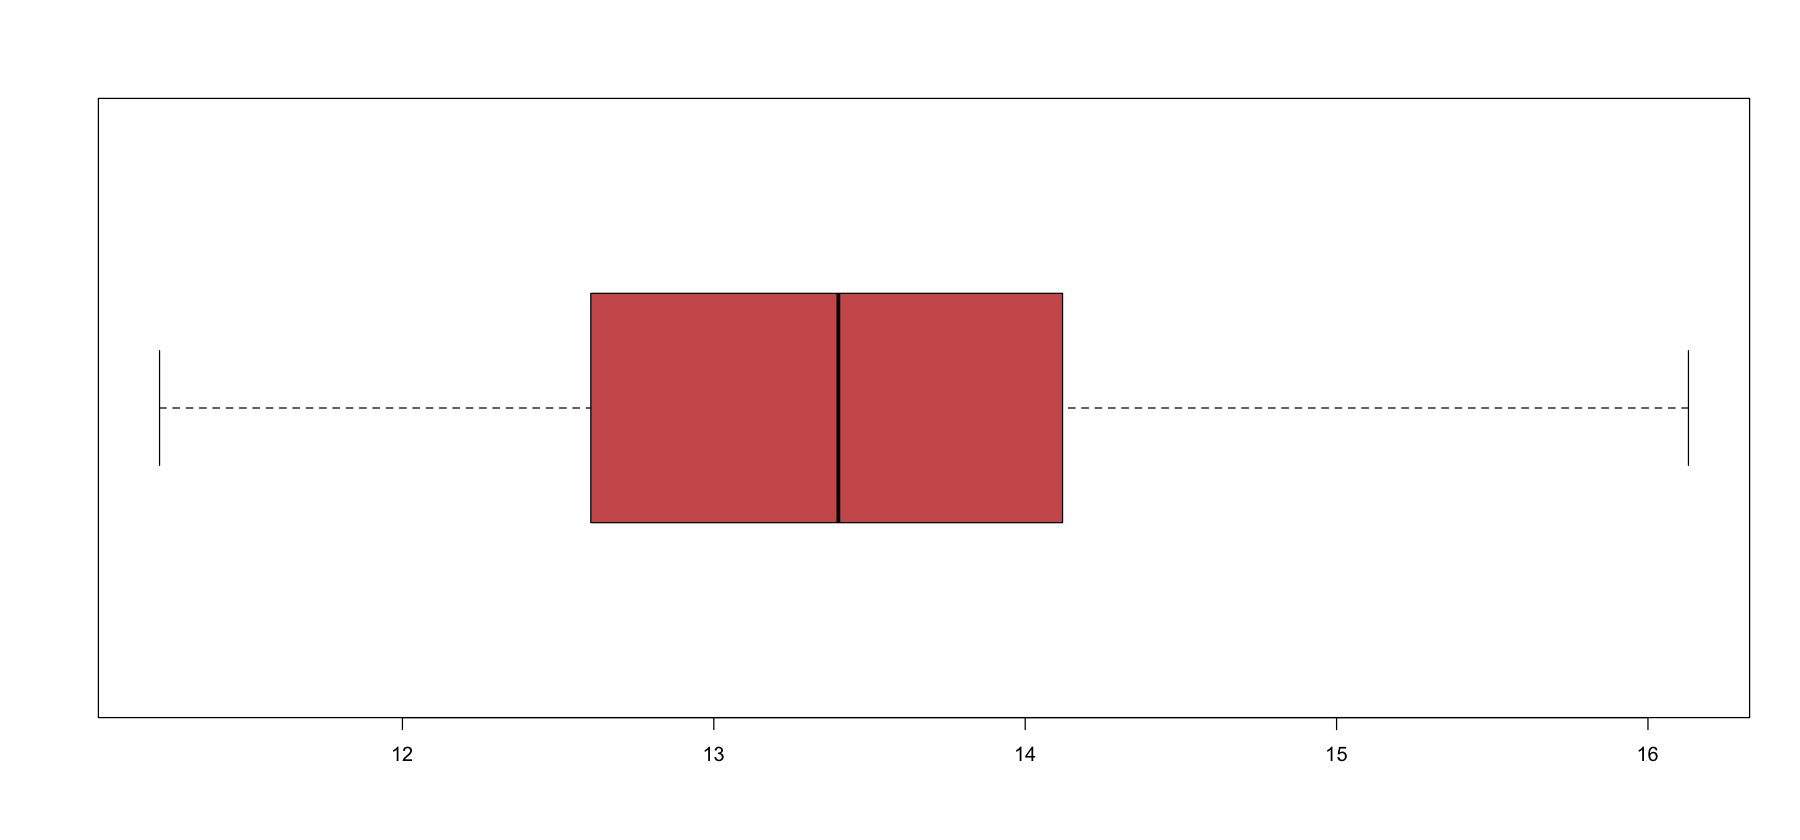

In [11]:
boxplot(T, horizontal = TRUE, col = "indianred")

---

### Quantile

Die Quantile der Daten sind

In [12]:
quantile(T)

ERROR: Error in quantile.default(T): missing values and NaN's not allowed if 'na.rm' is FALSE


Das Problem hier ist, dass `T` einträge vom Typ `NA` enthält. `NA` steht für *not available* und meint, dass der jeweilige Datenpunkt nicht verfügbar ist. Im Plot oben sehen wir eine grosse Lücke um das Jahr 1920.

Wir müssen die Daten zunächst filtern:

In [14]:
!is.na(T)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [17]:
T_filtered = T[!is.na(T)]
T_filtered

[1] 12.59 12.59 12.43 12.33 12.42 13.15 12.21 13.40 12.62 15.16 13.35 13.15
[13] 13.13 13.83 13.14 11.22 11.33 11.98 14.12 13.38 13.43 13.11 13.27 14.37
[25] 14.58 13.40 13.95 12.33 14.52 12.43 12.54 11.48 13.54 12.76 14.57 13.06
[37] 13.75 11.74 12.50 12.94 12.27 13.02 14.02 13.33 12.58 12.35 13.88 12.87
[49] 13.33 13.75 14.12 13.45 13.34 12.73 12.38 12.07 12.83 14.51 14.30 12.63
[61] 12.53 12.98 11.91 13.82 15.04 14.52 13.26 14.36 12.96 14.07 13.51 11.52
[73] 13.88 13.65 14.76 14.90 13.44 14.03 14.68 13.73 13.96 14.70 14.91 14.68
[85] 14.11 12.44 14.82 13.96 13.51 15.49 15.35 14.73 14.28 16.13 16.04

Jetzt funktioniert die Berechnung der Quantile.

In [18]:
q = quantile(T_filtered)
q

0%    25%    50%    75%   100% 
11.220 12.605 13.400 14.120 16.130

Die Quartile erhalten wir dann wie folgt:

In [19]:
unteres_quartil = q[2]
oberes_quartil = q[4]
median = q[3]

In [20]:
median

50% 
13.4

---

### Mittelwerte und Median

Der Mittelwert der Daten `T` ist:

In [22]:
m = mean(T_filtered)
m

[1] 13.45495

In [23]:
N = length(T_filtered)
sum(T_filtered) / N

[1] 13.45495

Der Median der Daten ist

In [21]:
med = median(T_filtered)
med

[1] 13.4

---

### Standardabweichung und Varianz

Die Standardabweichung der Daten `T` ist:

In [24]:
s = sd(T_filtered)
s

[1] 1.043071

Die Varianz ist

In [25]:
v = var(T_filtered)
v

[1] 1.087998

In [27]:
sqrt(sum((T_filtered - m)^2) / (N-1))

[1] 1.043071

Wir plotten Mittelwert, Median, Standardabweichung und die Quartile in einem Histogramm zusammen mit den Daten.

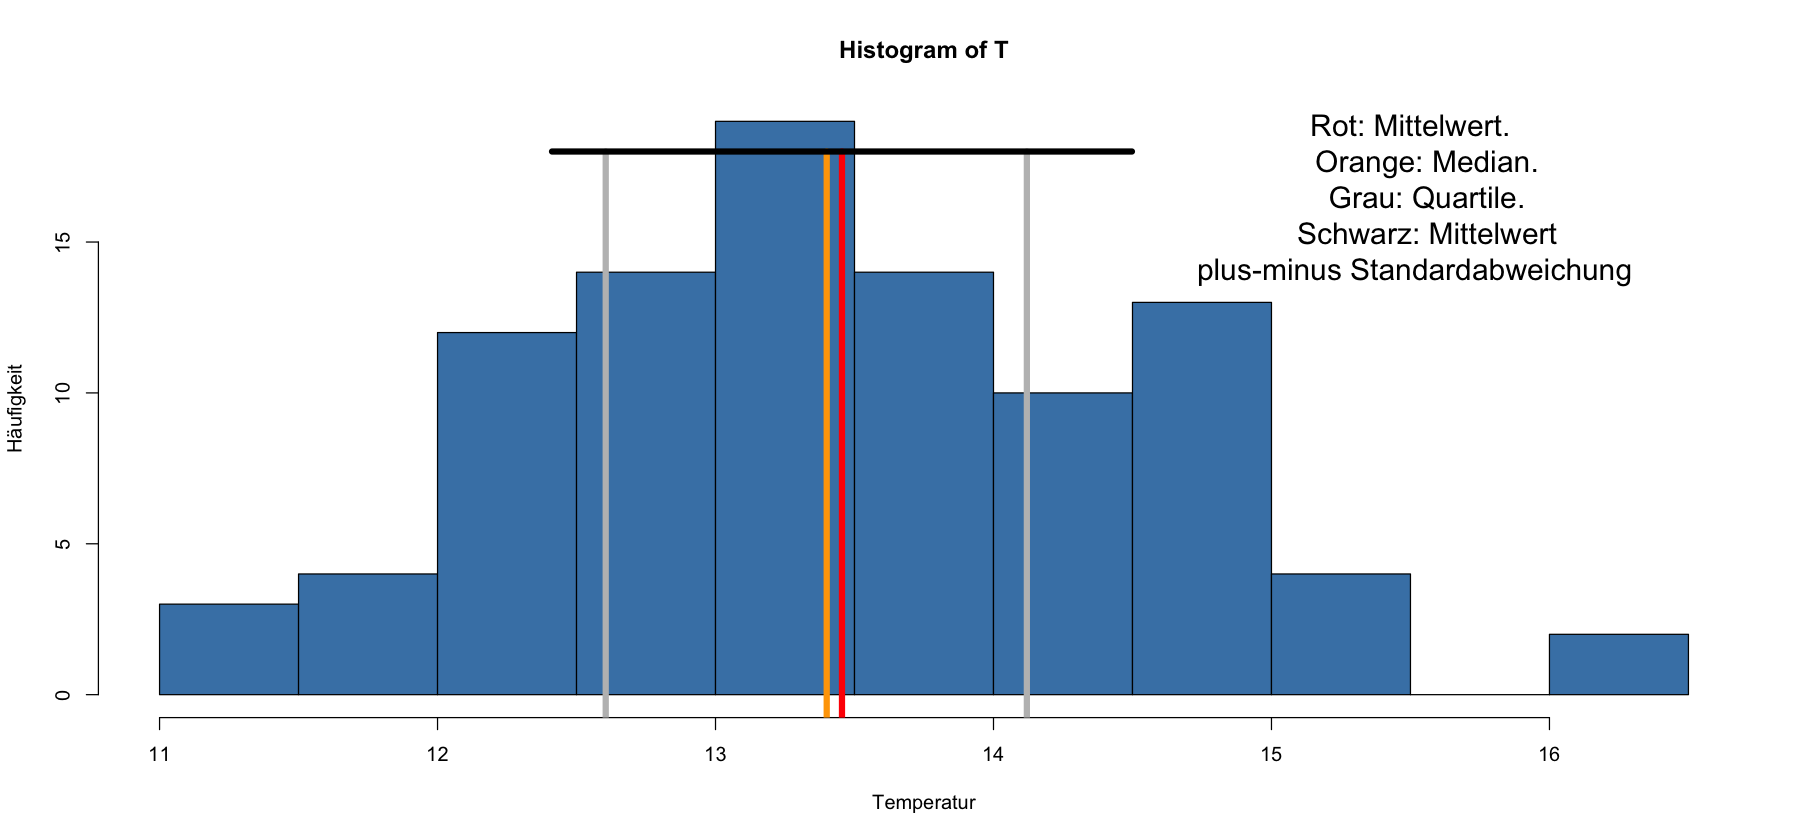

In [32]:
hist(T, xlab = "Temperatur", ylab = "Häufigkeit", col = "steelblue")
## mittelwert und median
lines(c(m,m), c(-1,18), col = "red", lw = 5)
lines(c(med,med), c(-1,18), col = "orange", lw = 5)
## quartile
lines(c(unteres_quartil,unteres_quartil), c(-1,18), col = "grey", lw = 5)
lines(c(oberes_quartil,oberes_quartil), c(-1,18), col = "grey", lw = 5)
##standardabweichung
lines(c(m-s,m+s), c(18,18), col = "black", lw = 5)
##text
text(15.5,16.5, label = 
    "Rot: Mittelwert.
    Orange: Median.
    Grau: Quartile.
    Schwarz: Mittelwert\n plus-minus Standardabweichung", 
    cex = 1.5)